In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import zipfile
import random
import os

#warnings removal
import warnings
warnings.filterwarnings('ignore')

import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing import image

2024-08-01 19:53:22.971480: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-01 19:53:22.971600: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-01 19:53:23.095191: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [7]:
#checking the directory structure
dataset_path = "/kaggle/input/food-101/food-101/food-101/images/"
print(os.listdir(dataset_path))

['macarons', 'french_toast', 'lobster_bisque', 'prime_rib', 'pork_chop', 'guacamole', 'baby_back_ribs', 'mussels', 'beef_carpaccio', 'poutine', 'hot_and_sour_soup', 'seaweed_salad', 'foie_gras', 'dumplings', 'peking_duck', 'takoyaki', 'bibimbap', 'falafel', 'pulled_pork_sandwich', 'lobster_roll_sandwich', 'carrot_cake', 'beet_salad', 'panna_cotta', 'donuts', 'red_velvet_cake', 'grilled_cheese_sandwich', 'cannoli', 'spring_rolls', 'shrimp_and_grits', 'clam_chowder', 'omelette', 'fried_calamari', 'caprese_salad', 'oysters', 'scallops', 'ramen', 'grilled_salmon', 'croque_madame', 'filet_mignon', 'hamburger', 'spaghetti_carbonara', 'miso_soup', 'bread_pudding', 'lasagna', 'crab_cakes', 'cheesecake', 'spaghetti_bolognese', 'cup_cakes', 'creme_brulee', 'waffles', 'fish_and_chips', 'paella', 'macaroni_and_cheese', 'chocolate_mousse', 'ravioli', 'chicken_curry', 'caesar_salad', 'nachos', 'tiramisu', 'frozen_yogurt', 'ice_cream', 'risotto', 'club_sandwich', 'strawberry_shortcake', 'steak', 'chu

In [8]:
#calorie information calorie/gram for each item
calorie_info = {
    'apple_pie': 2.5, 'baby_back_ribs': 3.5, 'baklava': 5, 'beef_carpaccio': 2,
    'beef_tartare': 2.5, 'beet_salad': 0.5, 'beignets': 3.5, 'bibimbap': 1.5,
    'bread_pudding': 2.5, 'breakfast_burrito': 2, 'bruschetta': 1, 'caesar_salad': 0.5,
    'cannoli': 3.5, 'caprese_salad': 1, 'carrot_cake': 3.5, 'ceviche': 0.5,
    'cheese_plate': 3.5, 'cheesecake': 3.5, 'chicken_curry': 1.5, 'chicken_quesadilla': 2.5,
    'chicken_wings': 3, 'chocolate_cake': 4, 'chocolate_mousse': 3, 'churros': 4,
    'clam_chowder': 1.5, 'club_sandwich': 2.5, 'crab_cakes': 2, 'creme_brulee': 3.5,
    'croque_madame': 3, 'cup_cakes': 3.5, 'deviled_eggs': 1, 'donuts': 4,
    'dumplings': 2.5, 'edamame': 1, 'eggs_benedict': 2.5, 'escargots': 1,
    'falafel': 2, 'filet_mignon': 2.5, 'fish_and_chips': 2.5, 'foie_gras': 4.5,
    'french_fries': 3.5, 'french_onion_soup': 1, 'french_toast': 2, 'fried_calamari': 2.5,
    'fried_rice': 1.5, 'frozen_yogurt': 1, 'garlic_bread': 4, 'gnocchi': 1.5,
    'greek_salad': 0.5, 'grilled_cheese_sandwich': 3, 'grilled_salmon': 2, 'guacamole': 2,
    'gyoza': 2, 'hamburger': 3.5, 'hot_and_sour_soup': 0.5, 'hot_dog': 3.5,
    'huevos_rancheros': 2, 'hummus': 1.5, 'ice_cream': 2, 'lasagna': 1.5,
    'lobster_bisque': 1, 'lobster_roll_sandwich': 2.5, 'macaroni_and_cheese': 3,
    'macarons': 4, 'miso_soup': 0.5, 'mussels': 0.5, 'nachos': 2.5,
    'omelette': 1.5, 'onion_rings': 2.5, 'oysters': 0.5, 'pad_thai': 2,
    'paella': 1.5, 'pancakes': 2, 'panna_cotta': 3.5, 'peking_duck': 4,
    'pho': 1, 'pizza': 2.5, 'pork_chop': 2.5, 'poutine': 2.5, 'prime_rib': 2.5,
    'pulled_pork_sandwich': 2.5, 'ramen': 1, 'ravioli': 1.5, 'red_velvet_cake': 4,
    'risotto': 1.5, 'samosa': 2, 'sashimi': 1, 'scallops': 1, 'seaweed_salad': 0.5,
    'shrimp_and_grits': 2, 'spaghetti_bolognese': 1.5, 'spaghetti_carbonara': 2,
    'spring_rolls': 1.5, 'steak': 2.5, 'strawberry_shortcake': 3.5, 'sushi': 1,
    'tacos': 2, 'takoyaki': 2.5, 'tiramisu': 3, 'tuna_tartare': 1.5,
    'waffles': 2
}

In [9]:
#calorie information for verification
for item, calories in calorie_info.items():
    print(f'{item}: {calories} calories per gram')

apple_pie: 2.5 calories per gram
baby_back_ribs: 3.5 calories per gram
baklava: 5 calories per gram
beef_carpaccio: 2 calories per gram
beef_tartare: 2.5 calories per gram
beet_salad: 0.5 calories per gram
beignets: 3.5 calories per gram
bibimbap: 1.5 calories per gram
bread_pudding: 2.5 calories per gram
breakfast_burrito: 2 calories per gram
bruschetta: 1 calories per gram
caesar_salad: 0.5 calories per gram
cannoli: 3.5 calories per gram
caprese_salad: 1 calories per gram
carrot_cake: 3.5 calories per gram
ceviche: 0.5 calories per gram
cheese_plate: 3.5 calories per gram
cheesecake: 3.5 calories per gram
chicken_curry: 1.5 calories per gram
chicken_quesadilla: 2.5 calories per gram
chicken_wings: 3 calories per gram
chocolate_cake: 4 calories per gram
chocolate_mousse: 3 calories per gram
churros: 4 calories per gram
clam_chowder: 1.5 calories per gram
club_sandwich: 2.5 calories per gram
crab_cakes: 2 calories per gram
creme_brulee: 3.5 calories per gram
croque_madame: 3 calories 

In [10]:
#image size and batch size
img_size = (224, 224)
batch_size = 32

#ImageDataGenerator for training and validation sets
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  #for validation
)

#data generators
train_generator = datagen.flow_from_directory(
    directory=dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    directory=dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 80800 images belonging to 101 classes.
Found 20200 images belonging to 101 classes.


In [12]:
print("\nClass indices:\n", train_generator.class_indices)


Class indices:
 {'apple_pie': 0, 'baby_back_ribs': 1, 'baklava': 2, 'beef_carpaccio': 3, 'beef_tartare': 4, 'beet_salad': 5, 'beignets': 6, 'bibimbap': 7, 'bread_pudding': 8, 'breakfast_burrito': 9, 'bruschetta': 10, 'caesar_salad': 11, 'cannoli': 12, 'caprese_salad': 13, 'carrot_cake': 14, 'ceviche': 15, 'cheese_plate': 16, 'cheesecake': 17, 'chicken_curry': 18, 'chicken_quesadilla': 19, 'chicken_wings': 20, 'chocolate_cake': 21, 'chocolate_mousse': 22, 'churros': 23, 'clam_chowder': 24, 'club_sandwich': 25, 'crab_cakes': 26, 'creme_brulee': 27, 'croque_madame': 28, 'cup_cakes': 29, 'deviled_eggs': 30, 'donuts': 31, 'dumplings': 32, 'edamame': 33, 'eggs_benedict': 34, 'escargots': 35, 'falafel': 36, 'filet_mignon': 37, 'fish_and_chips': 38, 'foie_gras': 39, 'french_fries': 40, 'french_onion_soup': 41, 'french_toast': 42, 'fried_calamari': 43, 'fried_rice': 44, 'frozen_yogurt': 45, 'garlic_bread': 46, 'gnocchi': 47, 'greek_salad': 48, 'grilled_cheese_sandwich': 49, 'grilled_salmon': 5

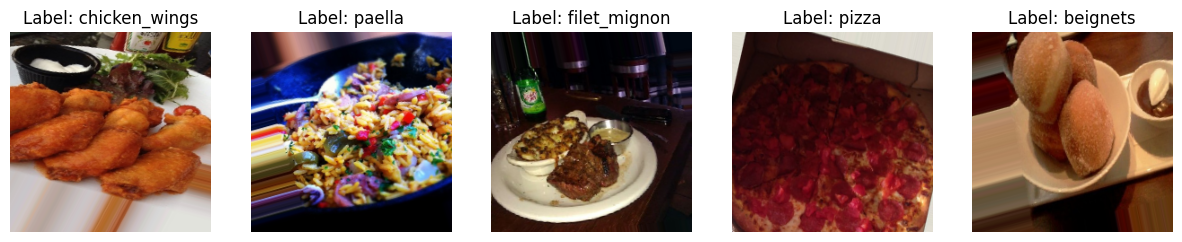

In [47]:
#display random images from the training dataset
def display_random_images(data_generator, num_images=5):
    # Get a batch of images and labels
    images, labels = next(data_generator)
    
    # Randomly select images and labels
    indices = np.random.choice(len(images), num_images, replace=False)
    
    plt.figure(figsize=(15, 12))
    
    for i, index in enumerate(indices):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[index])
        plt.title(f"Label: {list(train_generator.class_indices.keys())[np.argmax(labels[index])]}")
        plt.axis('off')
    
    plt.show()

#5 random images
display_random_images(train_generator, num_images=5)

In [46]:
#pre-trained MobileNetV2 model + higher level layers
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [16]:
#freeze the convolutional base
for layer in base_model.layers:
    layer.trainable = False

In [17]:
#adding custom layers on top
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dense(train_generator.num_classes, activation='softmax')(x)

In [18]:
#defining the model
model = Model(inputs=base_model.input, outputs=x)


In [19]:
#model compile
model.compile(
    optimizer=Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [20]:
#training/fit the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // 32,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // 32,
    epochs=5
)

Epoch 1/5
   1/2525 ━━━━━━━━━━━━━━━━━━━━ 12:12:53 17s/step - accuracy: 0.0000e+00 - loss: 4.5555

I0000 00:00:1722526139.918057      98 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


2525/2525 ━━━━━━━━━━━━━━━━━━━━ 2056s 808ms/step - accuracy: 0.3468 - loss: 2.7311 - val_accuracy: 0.4560 - val_loss: 2.1420
Epoch 2/5
2525/2525 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6250 - val_loss: 1.7503
Epoch 3/5
2525/2525 ━━━━━━━━━━━━━━━━━━━━ 1512s 598ms/step - accuracy: 0.4883 - loss: 2.0062 - val_accuracy: 0.4906 - val_loss: 2.0441
Epoch 4/5
2525/2525 ━━━━━━━━━━━━━━━━━━━━ 0s 99us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 1.8079
Epoch 5/5
2525/2525 ━━━━━━━━━━━━━━━━━━━━ 1410s 557ms/step - accuracy: 0.5129 - loss: 1.8932 - val_accuracy: 0.4912 - val_loss: 2.0308


In [21]:
#checking a few batches from the generator
for data_batch, labels_batch in train_generator:
    print(data_batch.shape)  #(batch_size, 224, 224, 3)
    print(labels_batch.shape)  #(batch_size, num_classes)
    break

(32, 224, 224, 3)
(32, 101)


In [22]:
#recompiling the model
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [23]:
#retraining the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // 32,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // 32,
    epochs=3
)

Epoch 1/3
2525/2525 ━━━━━━━━━━━━━━━━━━━━ 1337s 526ms/step - accuracy: 0.5686 - loss: 1.6383 - val_accuracy: 0.5262 - val_loss: 1.8918
Epoch 2/3
2525/2525 ━━━━━━━━━━━━━━━━━━━━ 2s 667us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 1.4664
Epoch 3/3
2525/2525 ━━━━━━━━━━━━━━━━━━━━ 1267s 501ms/step - accuracy: 0.5927 - loss: 1.5468 - val_accuracy: 0.5337 - val_loss: 1.8762


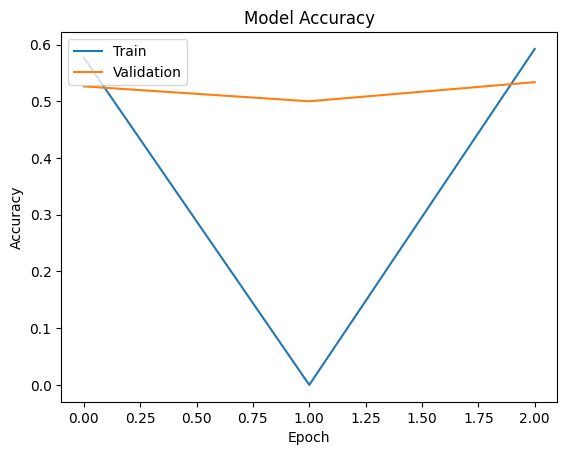

In [24]:
#training & validation accuracy values plot
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

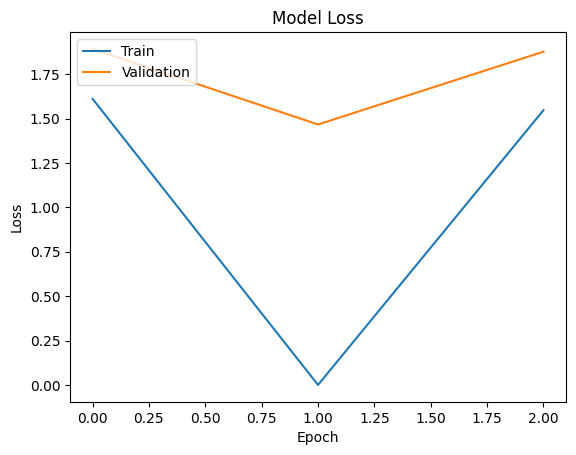

In [25]:
#training & validation loss values plot 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

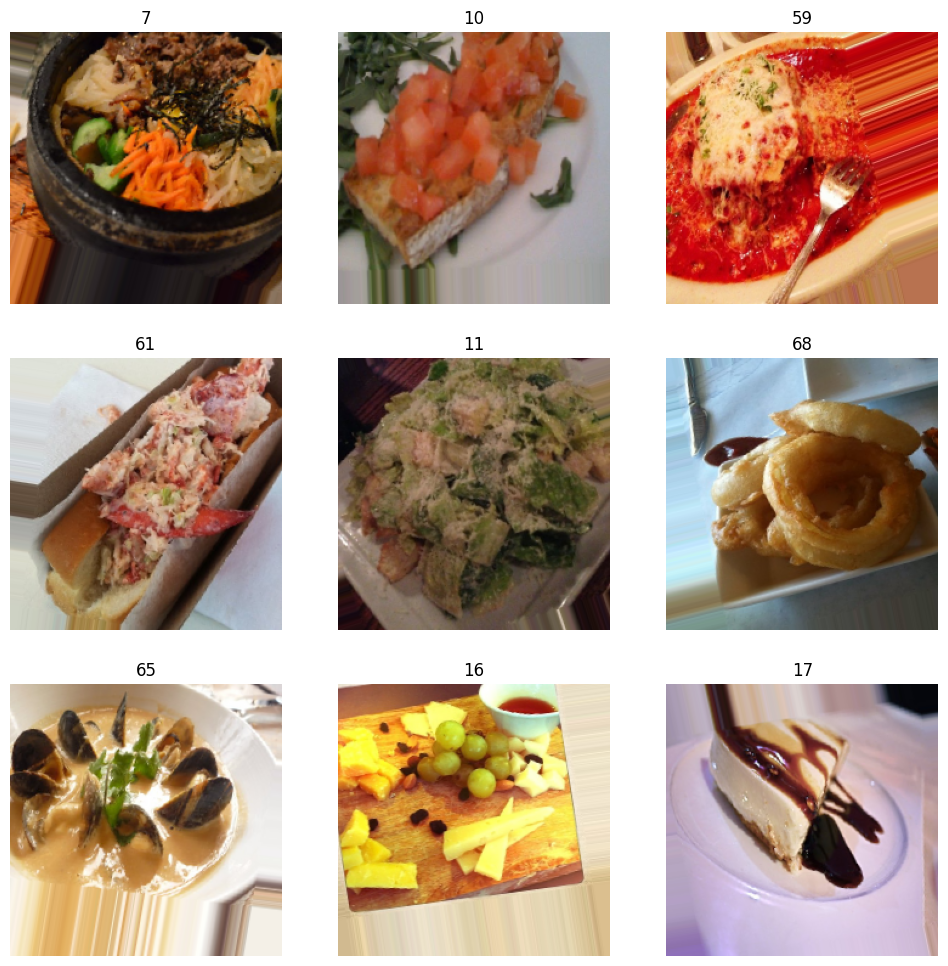

In [26]:
#a few sample images and their labels
def plot_images_from_generator(generator):
    batch = next(generator)
    images, labels = batch
    plt.figure(figsize=(12, 12))
    for i in range(9):
        plt.subplot(3, 3, i+1)
        plt.imshow(images[i])
        plt.title(np.argmax(labels[i]))
        plt.axis('off')
    plt.show()

plot_images_from_generator(train_generator)

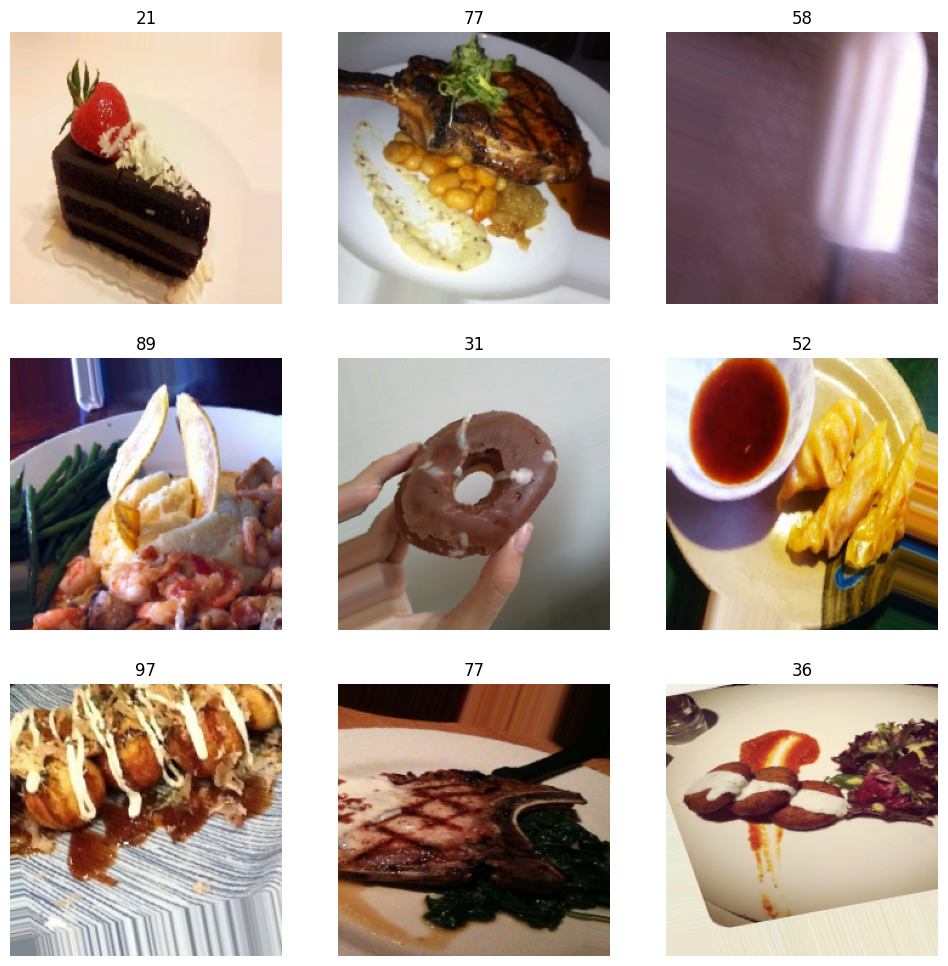

In [27]:
plot_images_from_generator(validation_generator)

In [28]:
#func to get the predicted class and corresponding calorie information
def get_calorie_info(prediction, calorie_info):
    class_labels = list(calorie_info.keys())
    predicted_class = class_labels[np.argmax(prediction)]
    return calorie_info.get(predicted_class, "Unknown")

In [48]:
#predict on a random image
def predict_and_show(image_path, model, calorie_info):
    img = load_img(image_path, target_size=(224, 224))
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)
    calorie_info_estimate = get_calorie_info(prediction[10], calorie_info)

    plt.imshow(img)
    plt.title(f"Predicted calorie content: {calorie_info_estimate} calories per gram")
    plt.axis('off')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


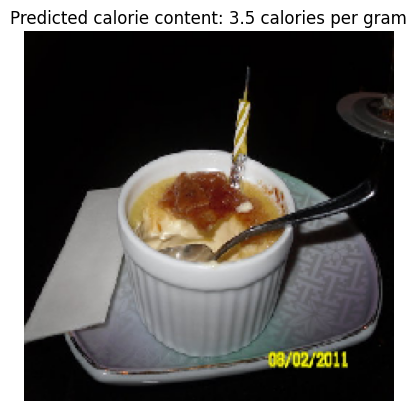

In [30]:
#example usage manual testing
example_image_path = "/kaggle/input/food-101/food-101/food-101/images/creme_brulee/751229.jpg" 
predict_and_show(example_image_path, model, calorie_info)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


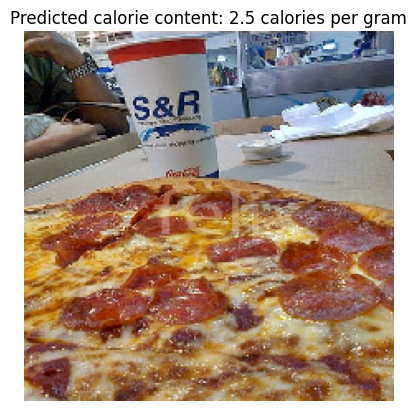

In [31]:
example_image_path = "/kaggle/input/food-101/food-101/food-101/images/pizza/3193599.jpg" 
predict_and_show(example_image_path, model, calorie_info)

In [32]:
#test data generator
test_datagen = ImageDataGenerator(rescale=1./255)

#test data loading
test_generator = test_datagen.flow_from_directory(
    directory='/kaggle/input/food-101/food-101/food-101/images/',
    target_size=(224, 224),
    batch_size=1,  #single image prediction
    class_mode='categorical',
    shuffle=False  #making sure that the images are not shuffled for accurate predictions
)

Found 101000 images belonging to 101 classes.


In [33]:
#predicting class probabilities for all test images
predictions = model.predict(test_generator, steps=test_generator.samples)
predicted_classes = np.argmax(predictions, axis=1)

101000/101000 ━━━━━━━━━━━━━━━━━━━━ 488s 5ms/step


In [34]:
#evaluating the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.samples)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

101000/101000 ━━━━━━━━━━━━━━━━━━━━ 530s 5ms/step - accuracy: 0.6039 - loss: 1.5059
Test Loss: 1.4302361011505127
Test Accuracy: 0.623019814491272


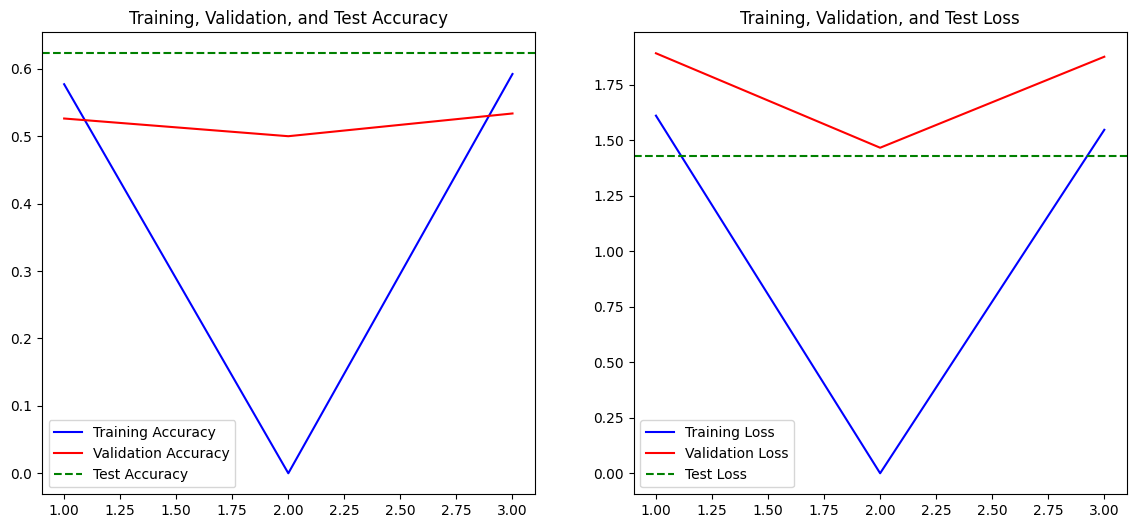

In [41]:
#plotting function
def plot_training_history(history, test_loss, test_accuracy):
    # Extract metrics from the training history
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    #plot accuracy
    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
    plt.axhline(y=test_accuracy, color='g', linestyle='--', label='Test Accuracy')
    plt.title('Training, Validation, and Test Accuracy')
    plt.legend()

    #plot loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b', label='Training Loss')
    plt.plot(epochs, val_loss, 'r', label='Validation Loss')
    plt.axhline(y=test_loss, color='g', linestyle='--', label='Test Loss')
    plt.title('Training, Validation, and Test Loss')
    plt.legend()

    plt.show()

#calling the plotting function
plot_training_history(history, test_loss, test_accuracy)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


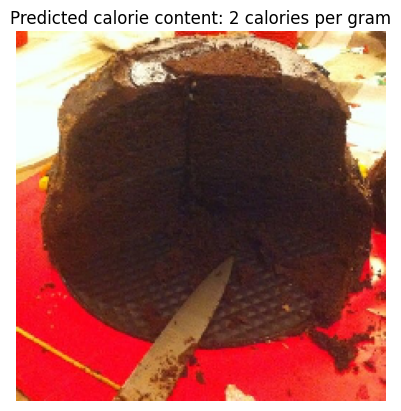

In [53]:
#from the test generator, from the ImageDataGenerator predicting a random image calorie with each code refresh
class_labels = {v: k for k, v in test_generator.class_indices.items()}

def get_calorie_info(class_index, calorie_info, class_labels):
    #the class label from the class index
    class_label = class_labels[class_index]
    #returning the calorie info for that class label
    return calorie_info.get(class_label, 'Unknown')

def predict_and_show_random_image(generator, model, calorie_info):
    #get class labels from the generator
    class_labels = {v: k for k, v in generator.class_indices.items()}
    
    #selecting a random index from the test dataset
    random_index = random.randint(0, len(generator) - 1)
    img, _ = generator[random_index]
    
    #first image from the batch
    img = img[0]
    
    #preprocessing the image
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    
    #predicting the class probabilities
    prediction = model.predict(img_array)
    predicted_class_index = np.argmax(prediction[0])
    
    #getting calorie info
    calorie_info_estimate = get_calorie_info(predicted_class_index, calorie_info, class_labels)
    
    #displaying the image and predicted calorie content
    plt.imshow(img)
    plt.title(f"Predicted calorie content: {calorie_info_estimate} calories per gram")
    plt.axis('off')
    plt.show()

predict_and_show_random_image(test_generator, model, calorie_info)

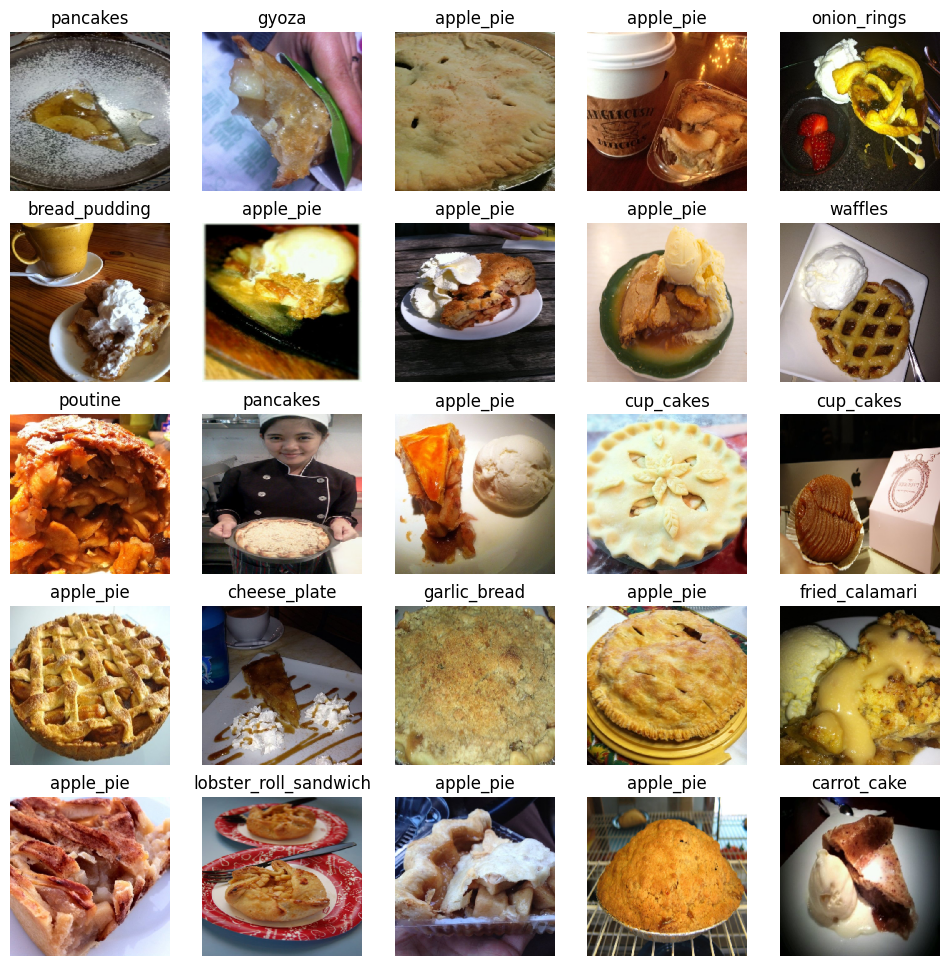

In [35]:
def plot_images_with_predictions(generator, predictions, class_indices, num_images=25):
    #mapping of class indices to class labels
    class_labels = {v: k for k, v in class_indices.items()}
    
    plt.figure(figsize=(12, 12))
    for i in range(num_images):
        #the image and the predicted class
        img, _ = generator[i]
        predicted_class = np.argmax(predictions[i])
        predicted_label = class_labels[predicted_class]
        
        #plot the image
        plt.subplot(5, 5, i + 1)
        plt.imshow(img[0])
        plt.title(predicted_label)
        plt.axis('off')
    
    plt.show()
#to plot test images with predictions
plot_images_with_predictions(test_generator, predictions, test_generator.class_indices)

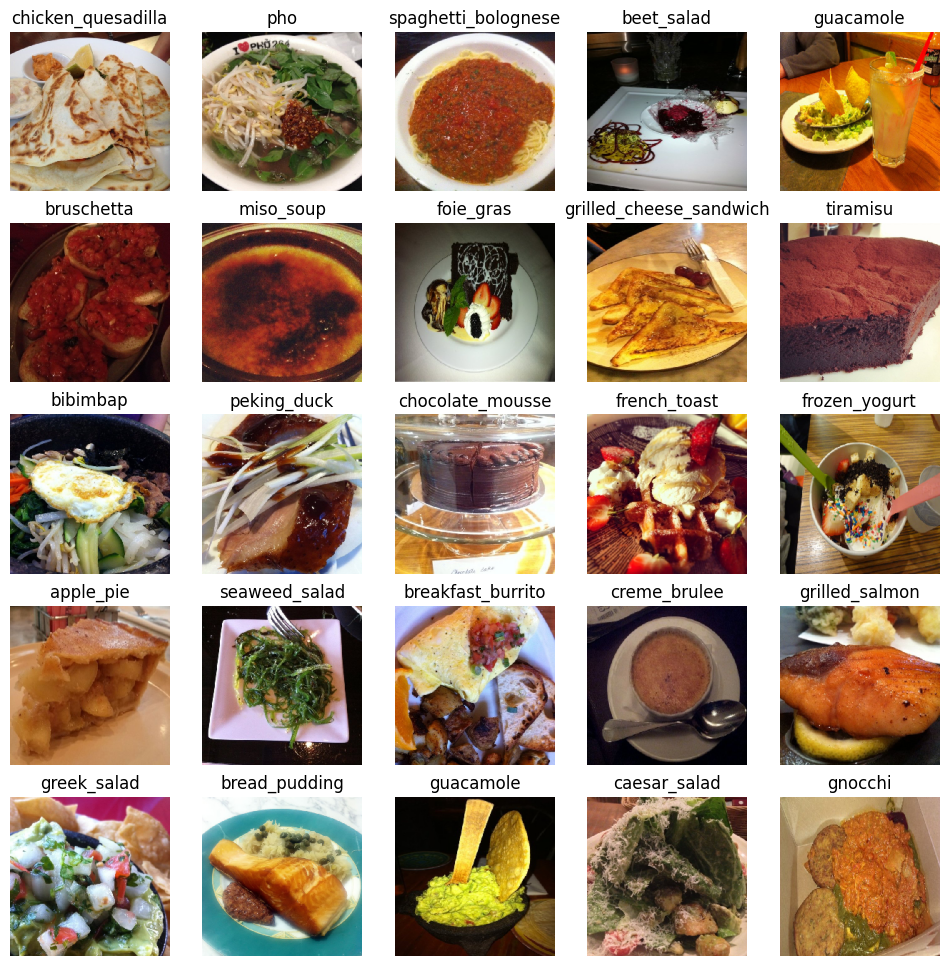

In [36]:
def plot_images_with_predictions(generator, predictions, class_indices, num_images=25):
    #random indices for displaying images
    random_indices = np.random.choice(len(predictions), num_images, replace=False)
    
    plt.figure(figsize=(12, 12))
    for i, idx in enumerate(random_indices):
        #the image and the predicted class
        img, _ = generator[idx]
        predicted_class = np.argmax(predictions[idx])
        predicted_label = class_labels[predicted_class]
        
        #plot the image
        plt.subplot(5, 5, i + 1)
        plt.imshow(img[0])
        plt.title(predicted_label)
        plt.axis('off')
    
    plt.show()

#to plot test images with predictions
plot_images_with_predictions(test_generator, predictions, test_generator.class_indices, num_images=25)

In [37]:
def load_and_preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  #batch dimension
    img_array /= 255.0  #rescale image
    return img_array

def predict_image(image_path, model, class_indices):
    img_array = load_and_preprocess_image(image_path)
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction[0])
    class_labels = {v: k for k, v in class_indices.items()}
    predicted_label = class_labels[predicted_class]
    return predicted_label

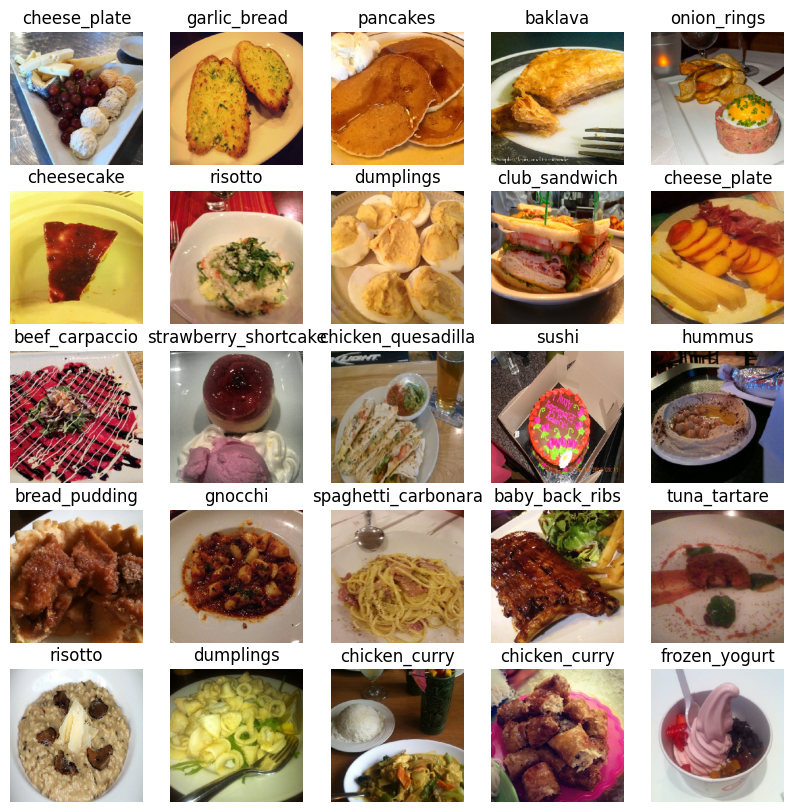

In [38]:
def plot_images_with_predictions(generator, predictions, class_indices, num_images=25):
    #mapping of class indices to class labels
    class_labels = {v: k for k, v in class_indices.items()}
    
    #generating random indices for displaying images
    random_indices = np.random.choice(len(predictions), num_images, replace=False)
    
    plt.figure(figsize=(10, 10))
    for i, idx in enumerate(random_indices):
        #the image and the predicted class
        img, _ = generator[idx]
        predicted_class = np.argmax(predictions[idx])
        predicted_label = class_labels[predicted_class]
        
        plt.subplot(5, 5, i + 1)
        plt.imshow(img[0])
        plt.title(predicted_label)
        plt.axis('off')
    
    plt.show()

#to plot test images with predictions
plot_images_with_predictions(test_generator, predictions, test_generator.class_indices, num_images=25)

In [39]:
#manual test
image_path = '/kaggle/input/food-101/food-101/food-101/images/spring_rolls/1528888.jpg'
predicted_label = predict_image(image_path, model, test_generator.class_indices)
print(f'Predicted label: {predicted_label}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicted label: caesar_salad


In [40]:
image_path = '/kaggle/input/food-101/food-101/food-101/images/waffles/951093.jpg' 
predicted_label = predict_image(image_path, model, test_generator.class_indices)
print(f'Predicted label: {predicted_label}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predicted label: waffles
